# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [2]:
# import 'Numpy' 
import numpy as np
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold,LeaveOneOut
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# 2. Collect and load data

In [3]:

df = pd.read_csv('bigcity.csv')
df.head()

Unnamed: 0    u    x
0           1  138  143
1           2   93  104
2           3   61   69
3           4  179  260
4           5   48   75

# 3. Explore numeric variables - five number summary

In [46]:
df.describe()

Unnamed: 0          u          x
count   49.000000  49.000000  49.000000
mean    25.000000 103.142857 127.795918
std     14.288690 104.405061 123.121211
min      1.000000   2.000000  46.000000
25%     13.000000  43.000000  58.000000
50%     25.000000  64.000000  79.000000
75%     37.000000 120.000000 130.000000
max     49.000000 507.000000 634.000000

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

AxesSubplot(0.125,0.125;0.775x0.755)


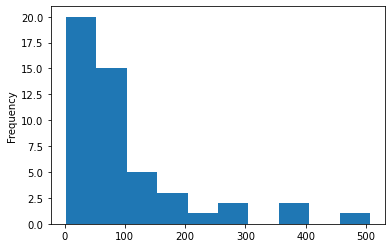

In [24]:
print(df['u'].plot(kind  = 'hist'))
# print(df['x'].plot(kind  = 'hist'))

AxesSubplot(0.125,0.125;0.775x0.755)


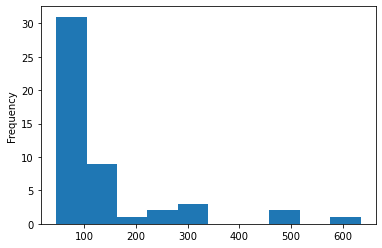

In [25]:
print(df['x'].plot(kind  = 'hist'))

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1440x360 with 0 Axes>

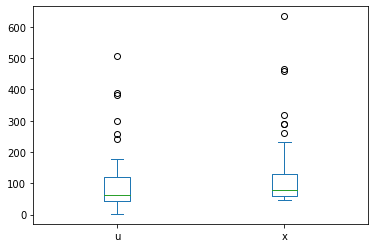

In [26]:
plt.figure(figsize=(20,5))
print(df.iloc[:,1:].plot(kind  = 'box'))

plt.show()

In [27]:
df.describe()

Unnamed: 0          u          x
count   49.000000  49.000000  49.000000
mean    25.000000 103.142857 127.795918
std     14.288690 104.405061 123.121211
min      1.000000   2.000000  46.000000
25%     13.000000  43.000000  58.000000
50%     25.000000  64.000000  79.000000
75%     37.000000 120.000000 130.000000
max     49.000000 507.000000 634.000000

In [28]:
df.var()

Unnamed: 0     204.166667
u            10900.416667
x            15158.832483
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

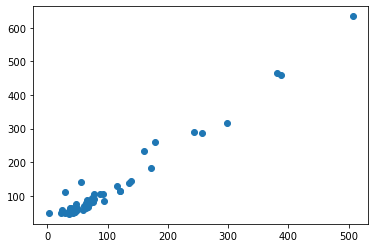

In [47]:
plt.scatter(df['u'],df['x'])
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [49]:
df.shape

(49, 3)

In [51]:
x = df['u']
y = df['x']
x = sm.add_constant(x)
mode = sm.OLS(y,x).fit()
mode.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1252.
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.57e-35
Time:                        14:53:17   Log-Likelihood:                -223.55
No. Observations:                  49   AIC:                             451.1
Df Residuals:                      47   BIC:                             454.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3840      4.777      1.755      0.086      -1.226      17.994
u              1.1577      0.033     35.383      0.000       1.092       1.224
==============================================================================
Omnibus:                       12.819   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.429
Skew:                           1.084   Prob(JB):                      0.00121
Kurtosis:                       4.369   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [53]:
df.iloc[:,1:].corr()

u        x
u 1.000000 0.981742
x 0.981742 1.000000

In [54]:
df.isnull().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)




(39, 2)
(39,)
(10, 2)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [93]:
print(mode1.coef_)
print(mode1.intercept_)


[0.         1.16155798]
5.662522617269246


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

<AxesSubplot:xlabel='u', ylabel='x'>

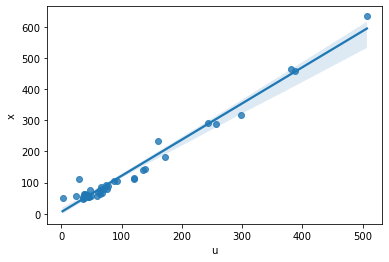

In [95]:
sns.regplot(x = x_train.iloc[:,1:], y = y_train)


In [132]:
b1 = mode1.coef_
b0 = mode1.intercept_
b1[1]

1.1615579764807604

In [134]:
d = b1[1]*df['u'] + b0

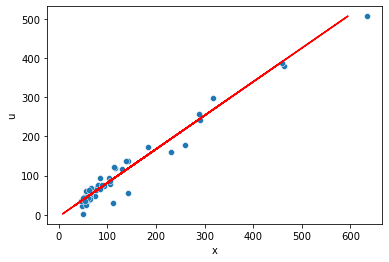

In [135]:
plt.plot(d,df['u'],color='red')
sns.scatterplot(df['x'],df['u'])
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions=mode1.predict(pd.DataFrame(x_test))
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predictions)
print('Root mean square error=',rmse)
print('r2 score=',r2)

Root mean square error= 29.588647721155883
r2 score= 0.7740675938150546


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [139]:
mode1.score(pd.DataFrame(x_train),y_train)

0.9737243775595023

In [141]:
mode1.score(pd.DataFrame(x_test),y_test)

0.7740675938150546